# Inisiasi Data

In [ ]:
# Importing Library
import pandas as pd
import numpy as np
from google.colab import drive

# Hubungkan Google Drive
drive.mount('/content/drive')

# Menentukan Lokasi File di Google Drive
file_path = '//content/drive/MyDrive/skripsi/Data/rate2/Data PLN/PLN MOBILE/Scrap_2024_PLN Mobile(12.354).csv'

# Membaca file CSV dari Google Drive
df_dt = pd.read_csv(file_path)

# Tampilkan data
df_dt

Mounted at /content/drive


,nama_user,rating,waktu,ulasan
0,12 Chanel,5,2024-04-19 13:31:21,Pelayanan nya cepat dan ramah terima kasih pln...
1,16-Komang Dandy Surya Adriawan-6D,5,2024-05-29 15:10:27,"Aplikasinya sangat membantu, sangat mudah digu..."
2,197OO2O63 Atangmulyana,5,2024-06-19 11:29:41,Pelayanan bagus cepat terimakasih atas pelayan...
3,27_I Gede Oka Suputra,5,2024-06-11 3:18:32,"Aplikasi sangat baik dan cepat, dapat mempermu..."
4,284 Seririt,5,2024-06-01 2:11:11,"Melalui aplikasi PLN mobile, sangat bermanfaat..."
...,...,...,...,...
12349,Zulkifli Kifli,5,2024-05-07 12:20:20,Terima kasih pln mobile semakin mudah banyak f...
12350,Zuwanda Lubis,5,2024-06-27 8:00:18,sangat Banyak manfaatnya dan membantu percepat...
12351,Zyfania Putri,5,2024-05-29 12:12:21,"Bayar listrik bikin mudah, cepet juga. Aplikas..."
12352,محمد أكبر رافعان,3,2024-03-27 12:45:01,Cara mengecek padam lampu tidak saya mengerti;...


# Import Data

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import csv
import matplotlib.pyplot as plt
import string
import gensim
from gensim.corpora import Dictionary
from gensim.test.utils import get_tmpfile
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Install Sastrawi for Indonesian text processing
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.pipeline import Pipeline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.0 MB/s eta 0:00:00


# Preprocessing

### Case Folding

In [ ]:
# Function for case folding
def casefoldingText(ulasan):
    ulasan = ulasan.lower()
    return ulasan

df_dt['case_folding'] = df_dt['ulasan'].apply(casefoldingText)
df_dt[['ulasan', 'case_folding']]

,ulasan,case_folding
0,Pelayanan nya cepat dan ramah terima kasih pln...,pelayanan nya cepat dan ramah terima kasih pln...
1,"Aplikasinya sangat membantu, sangat mudah digu...","aplikasinya sangat membantu, sangat mudah digu..."
2,Pelayanan bagus cepat terimakasih atas pelayan...,pelayanan bagus cepat terimakasih atas pelayan...
3,"Aplikasi sangat baik dan cepat, dapat mempermu...","aplikasi sangat baik dan cepat, dapat mempermu..."
4,"Melalui aplikasi PLN mobile, sangat bermanfaat...","melalui aplikasi pln mobile, sangat bermanfaat..."
...,...,...
12349,Terima kasih pln mobile semakin mudah banyak f...,terima kasih pln mobile semakin mudah banyak f...
12350,sangat Banyak manfaatnya dan membantu percepat...,sangat banyak manfaatnya dan membantu percepat...
12351,"Bayar listrik bikin mudah, cepet juga. Aplikas...","bayar listrik bikin mudah, cepet juga. aplikas..."
12352,Cara mengecek padam lampu tidak saya mengerti;...,cara mengecek padam lampu tidak saya mengerti;...


### Remove Punctuation

In [ ]:
#Remove Punctuation
import string
import re

# Menggabungkan kedua fungsi menjadi satu
def remove_and_clean_punct(ulasan):
    # Langkah dari removePunc
    ulasan = re.sub(r'@[A-Za-z0-9]+', '', ulasan) # Remove mentions
    ulasan = re.sub(r'RT[\s]', '', ulasan) # Remove retweet indicators
    ulasan = re.sub(r"https\S+", '', ulasan) # Remove URLs
    ulasan = re.sub(r'[0-9]+', '', ulasan) # Remove numbers
    ulasan = re.sub(r'(.)\1+', r'\1\1', ulasan) # Remove repeated characters
    ulasan = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', ulasan) # Remove repeated punctuations
    ulasan = re.sub(r'[^a-zA-Z]', ' ', ulasan) # Remove non-alphabetic characters
    ulasan = re.sub(r'\b(\w+)( \1\b)+', r'\1', ulasan) # Remove duplicate words
    ulasan = ulasan.replace('\n', ' ') # Remove newline characters
    ulasan = ulasan.translate(str.maketrans('', '', string.punctuation)) # Remove punctuations

    # Langkah dari clean_punct
    clean_spcl = re.compile('[/(){}\[\]\|@,;]')
    clean_symbol = re.compile('[^0-9a-z]')
    ulasan = clean_spcl.sub('', ulasan) # Remove specific special characters
    ulasan = clean_symbol.sub(' ', ulasan) # Replace non-alphanumeric characters with space

    ulasan = ulasan.strip() # Remove leading and trailing spaces

    return ulasan

# Terapkan fungsi gabungan pada data
df_dt['remove_punct'] = df_dt['case_folding'].apply(remove_and_clean_punct)

# Tampilkan hasil
df_dt[['case_folding', 'remove_punct']]

,case_folding,remove_punct
0,pelayanan nya cepat dan ramah terima kasih pln...,pelayanan nya cepat dan ramah terima kasih pln...
1,"aplikasinya sangat membantu, sangat mudah digu...",aplikasinya sangat membantu sangat mudah digu...
2,pelayanan bagus cepat terimakasih atas pelayan...,pelayanan bagus cepat terimakasih atas pelayan...
3,"aplikasi sangat baik dan cepat, dapat mempermu...",aplikasi sangat baik dan cepat dapat mempermu...
4,"melalui aplikasi pln mobile, sangat bermanfaat...",melalui aplikasi pln mobile sangat bermanfaat...
...,...,...
12349,terima kasih pln mobile semakin mudah banyak f...,terima kasih pln mobile semakin mudah banyak f...
12350,sangat banyak manfaatnya dan membantu percepat...,sangat banyak manfaatnya dan membantu percepat...
12351,"bayar listrik bikin mudah, cepet juga. aplikas...",bayar listrik bikin mudah cepet juga aplikas...
12352,cara mengecek padam lampu tidak saya mengerti;...,cara mengecek padam lampu tidak saya mengerti ...


### Normalisasi/SlangWord

In [ ]:
#Normalisasi/slangword
data_slang = pd.read_csv('/content/drive/MyDrive/skripsi/Slangword/slang/kamus_alay_normalisasi.csv')
def replace_slang(ulasan):
    res = ''
    for item in ulasan.split():
        if item in data_slang.slang.values:
            res += data_slang[data_slang['slang'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

df_dt['normalisasi_sw'] = df_dt['remove_punct'].apply(replace_slang)
df_dt[['remove_punct', 'normalisasi_sw']]

,remove_punct,normalisasi_sw
0,pelayanan nya cepat dan ramah terima kasih pln...,pelayanan nya cepat dan ramah terima kasih pln...
1,aplikasinya sangat membantu sangat mudah digu...,aplikasinya sangat membantu sangat mudah digun...
2,pelayanan bagus cepat terimakasih atas pelayan...,pelayanan bagus cepat terimakasih atas pelayan...
3,aplikasi sangat baik dan cepat dapat mempermu...,aplikasi sangat baik dan cepat dapat mempermud...
4,melalui aplikasi pln mobile sangat bermanfaat...,melalui aplikasi pln mobile sangat bermanfaat ...
...,...,...
12349,terima kasih pln mobile semakin mudah banyak f...,terima kasih pln mobile semakin mudah banyak f...
12350,sangat banyak manfaatnya dan membantu percepat...,sangat banyak manfaatnya dan membantu percepat...
12351,bayar listrik bikin mudah cepet juga aplikas...,bayar listrik bikin mudah cepat juga aplikasin...
12352,cara mengecek padam lampu tidak saya mengerti ...,cara mengecek padam lampu tidak saya mengerti ...


# Spelling Corrector peter Norvig X N-Gram

### Download Corpus

In [ ]:
# download and extract indo4B
#!wget https://storage.googleapis.com/babert-pretraining/IndoNLU_finals/dataset/preprocessed/dataset_wot_uncased_blanklines.tar.xz
#!tar -xvf dataset_wot_uncased_blanklines.tar.xz

### Peter Norvig

In [ ]:
# Peter Norvig Spell Corrector
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

path_corpus = "/content/drive/MyDrive/skripsi/Spelling/wikipedia_conllu.txt"

WORDS = Counter(words(open(path_corpus).read()))

def P(word, N=sum(WORDS.values())):
    "Probability of word."
    return WORDS[word] / N

# Selection mechanism
def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

# Candidate model
def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

# Error model
def known(words):
    "The subset of words that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from word."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "All edits that are two edits away from word."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def norvig_correction(ulasan):
    corrected_words = [correction(word) for word in ulasan.split()]
    return ' '.join(corrected_words)  # Join corrected words back into a single string

# Menyimpan Hasil ke File CSV
output_path = "/content/drive/MyDrive/skripsi/Spelling/review.csv"
df_dt.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

df_dt['peter_norvig_correction'] = df_dt['normalisasi_sw'].apply(norvig_correction)
df_dt['probabilities'] = df_dt['peter_norvig_correction'].apply(lambda x: [P(word) for word in x.split()])
df_dt[['normalisasi_sw', 'peter_norvig_correction', 'probabilities']]

Results saved to /content/drive/MyDrive/skripsi/Spelling/review.csv


,normalisasi_sw,peter_norvig_correction,probabilities
0,pelayanan nya cepat dan ramah terima kasih pln...,pelayanan nya cepat dan ramah terima kasih pln...,"[0.00011048389532138393, 0.0002443603492518345..."
1,aplikasinya sangat membantu sangat mudah digun...,aplikasinya sangat membantu sangat mudah digun...,"[2.8500920276026585e-06, 0.000803305446402828,..."
2,pelayanan bagus cepat terimakasih atas pelayan...,pelayanan bagus cepat terimakasih atas pelayan...,"[0.00011048389532138393, 5.6051809876185614e-0..."
3,aplikasi sangat baik dan cepat dapat mempermud...,aplikasi sangat baik dan cepat dapat mempermud...,"[0.00011328726452886195, 0.000803305446402828,..."
4,melalui aplikasi pln mobile sangat bermanfaat ...,melalui aplikasi pln mobile sangat bermanfaat ...,"[0.0006531227282488803, 0.00011328726452886195..."
...,...,...,...
12349,terima kasih pln mobile semakin mudah banyak f...,terima kasih pln mobile semakin mudah banyak f...,"[2.5199174320552466e-05, 7.259168820030596e-05..."
12350,sangat banyak manfaatnya dan membantu percepat...,sangat banyak manfaatnya dan membantu percepat...,"[0.000803305446402828, 0.0012322832322404654, ..."
12351,bayar listrik bikin mudah cepat juga aplikasin...,bayar listrik bikin mudah cepat juga aplikasin...,"[7.039571565444818e-06, 0.00013079274780222473..."
12352,cara mengecek padam lampu tidak saya mengerti ...,cara mengecek padam lampu tidak saya mengerti ...,"[0.0003006301989552684, 2.7254978406036353e-06..."


In [ ]:
# contoh perbaikan kata 'kliru'
correction('kliru')

'keliru'

In [ ]:
print(f'Banyak kata dari language model: {len(WORDS)}')
print(f'Total kemunculan semua kata: {sum(WORDS.values())}')

Banyak kata dari language model: 1175781
Total kemunculan semua kata: 64208453


In [ ]:
# menampilkan 10 kata yang muncul terbanyak
WORDS.most_common(10)

[('dan', 1402981),
 ('yang', 1357445),
 ('di', 1153442),
 ('pada', 691165),
 ('dari', 596901),
 ('dengan', 541967),
 ('ini', 527518),
 ('dalam', 459243),
 ('untuk', 446584),
 ('tahun', 361049)]

In [ ]:
known(['kliru'])  # hasilnya kata 'kcing' tidak terdapat pada language model

set()

In [ ]:
# cek dari kumpulan candidates yang terdapat pada language model
known(edits1('kliru'))

{'kairu', 'keliru', 'khiru', 'kiru', 'kleru', 'klir', 'klru', 'liru'}

In [ ]:
words = ['kairu', 'keliru', 'khiru', 'kiru', 'kleru', 'klir', 'klru', 'liru']

# hitung probabilitas
for c in words:
    print(f'P({c}) = {P(c)}')

P(kairu) = 1.5574273374877915e-08
P(keliru) = 9.26669265805236e-06
P(khiru) = 1.5574273374877915e-08
P(kiru) = 4.2050538112170373e-07
P(kleru) = 1.5574273374877915e-08
P(klir) = 6.229709349951166e-08
P(klru) = 3.114854674975583e-08
P(liru) = 4.672282012463375e-08


### N-Gram & jaccard_sim

In [ ]:
# Contoh N-gram
def n_grams(word, n):
    """Generate n-grams for a given word."""
    ngrams = [word[i:i+n] for i in range(len(word) - n + 1)]
    return ngrams

# Contoh penggunaan
word = "example"
n = 2
print(n_grams(word, n))

['ex', 'xa', 'am', 'mp', 'pl', 'le']


#### N-Gram (Bigram)

In [ ]:
# Generate N-grams
def n_grams(word, n):
    return [word[i:i+n] for i in range(len(word)-n+1)]

def generate_ngrams(ulasan, n):
    n_grams_list = []
    for word in ulasan:
        n_grams_list.append(n_grams(word, n))
    return n_grams_list

n = 2  # Example for bigrams
df_dt['n_grams'] = df_dt['peter_norvig_correction'].apply(lambda x: generate_ngrams(x.split(), n))
df_dt[['peter_norvig_correction', 'n_grams']]

,peter_norvig_correction,n_grams
0,pelayanan nya cepat dan ramah terima kasih pln...,"[[pe, el, la, ay, ya, an, na, an], [ny, ya], [..."
1,aplikasinya sangat membantu sangat mudah digun...,"[[ap, pl, li, ik, ka, as, si, in, ny, ya], [sa..."
2,pelayanan bagus cepat terimakasih atas pelayan...,"[[pe, el, la, ay, ya, an, na, an], [ba, ag, gu..."
3,aplikasi sangat baik dan cepat dapat mempermud...,"[[ap, pl, li, ik, ka, as, si], [sa, an, ng, ga..."
4,melalui aplikasi pln mobile sangat bermanfaat ...,"[[me, el, la, al, lu, ui], [ap, pl, li, ik, ka..."
...,...,...
12349,terima kasih pln mobile semakin mudah banyak f...,"[[te, er, ri, im, ma], [ka, as, si, ih], [pl, ..."
12350,sangat banyak manfaatnya dan membantu percepat...,"[[sa, an, ng, ga, at], [ba, an, ny, ya, ak], [..."
12351,bayar listrik bikin mudah cepat juga aplikasin...,"[[ba, ay, ya, ar], [li, is, st, tr, ri, ik], [..."
12352,cara mengecek padam lampu tidak saya mengerti ...,"[[ca, ar, ra], [me, en, ng, ge, ec, ce, ek], [..."


#### Jaccard Similarity

In [ ]:
# Menghasilkan N-grams untuk semua kata dalam korpus untuk digunakan dalam perbaikan
corpus_ngrams = {word: generate_ngrams([word], n) for word in WORDS}

# Calculate Jaccard Index
def jaccard_index(set1, set2):
    intersection = len(set(set1).intersection(set(set2)))
    union = len(set(set1).union(set(set2)))
    if union == 0:
        return 0  # Return 0 to avoid division by zero
    return intersection / union

# Perbaikan kata menggunakan N-grams
def ngram_correction(word):
    word_ngrams = n_grams(word, n)
    max_similarity = 0
    best_match = word

    for corpus_word, corpus_word_ngrams in corpus_ngrams.items():
        similarity = jaccard_index(word_ngrams, corpus_word_ngrams[0])
        if similarity > max_similarity:
            max_similarity = similarity
            best_match = corpus_word

    return best_match

# Terapkan perbaikan N-grams pada kata-kata yang tidak dikenali oleh Peter Norvig
def combined_correction(ulasan):
    corrected_words = []
    for word in ulasan.split():
        if word not in WORDS:
            corrected_words.append(ngram_correction(word))
        else:
            corrected_words.append(word)
    return ' '.join(corrected_words)

df_dt['combine_correction'] = df_dt['peter_norvig_correction'].apply(combined_correction)
df_dt[['normalisasi_sw', 'peter_norvig_correction', 'combine_correction']]

# Save the results to a CSV file
output_path = "/content/drive/MyDrive/skripsi/Spelling/corrected_reviews.csv"
df_dt.to_csv(output_path, index=False)
print(f"Results saved to {output_path}")

# Tampilkan hasil seluruh kata yang sudah diperbaiki dari proses Peter Norvig dan N-gram
df_dt[['normalisasi_sw', 'peter_norvig_correction', 'combine_correction']]

Results saved to /content/drive/MyDrive/skripsi/Spelling/corrected_reviews.csv


,normalisasi_sw,peter_norvig_correction,combine_correction
0,pelayanan nya cepat dan ramah terima kasih pln...,pelayanan nya cepat dan ramah terima kasih pln...,pelayanan nya cepat dan ramah terima kasih pln...
1,aplikasinya sangat membantu sangat mudah digun...,aplikasinya sangat membantu sangat mudah digun...,aplikasinya sangat membantu sangat mudah digun...
2,pelayanan bagus cepat terimakasih atas pelayan...,pelayanan bagus cepat terimakasih atas pelayan...,pelayanan bagus cepat terimakasih atas pelayan...
3,aplikasi sangat baik dan cepat dapat mempermud...,aplikasi sangat baik dan cepat dapat mempermud...,aplikasi sangat baik dan cepat dapat mempermud...
4,melalui aplikasi pln mobile sangat bermanfaat ...,melalui aplikasi pln mobile sangat bermanfaat ...,melalui aplikasi pln mobile sangat bermanfaat ...
...,...,...,...
12349,terima kasih pln mobile semakin mudah banyak f...,terima kasih pln mobile semakin mudah banyak f...,terima kasih pln mobile semakin mudah banyak f...
12350,sangat banyak manfaatnya dan membantu percepat...,sangat banyak manfaatnya dan membantu percepat...,sangat banyak manfaatnya dan membantu percepat...
12351,bayar listrik bikin mudah cepat juga aplikasin...,bayar listrik bikin mudah cepat juga aplikasin...,bayar listrik bikin mudah cepat juga aplikasin...
12352,cara mengecek padam lampu tidak saya mengerti ...,cara mengecek padam lampu tidak saya mengerti ...,cara mengecek padam lampu tidak saya mengerti ...


### Tokenisasi

In [ ]:
#Tokenisasi
from nltk.tokenize import word_tokenize
def tokenizingText(ulasan):
    ulasan = word_tokenize(ulasan)
    return ulasan

df_dt['tokenisasi'] = df_dt['combine_correction'].apply(tokenizingText)
df_dt[['combine_correction', 'tokenisasi']]

,combine_correction,tokenisasi
0,pelayanan nya cepat dan ramah terima kasih pln...,"[pelayanan, nya, cepat, dan, ramah, terima, ka..."
1,aplikasinya sangat membantu sangat mudah digun...,"[aplikasinya, sangat, membantu, sangat, mudah,..."
2,pelayanan bagus cepat terimakasih atas pelayan...,"[pelayanan, bagus, cepat, terimakasih, atas, p..."
3,aplikasi sangat baik dan cepat dapat mempermud...,"[aplikasi, sangat, baik, dan, cepat, dapat, me..."
4,melalui aplikasi pln mobile sangat bermanfaat ...,"[melalui, aplikasi, pln, mobile, sangat, berma..."
...,...,...
12349,terima kasih pln mobile semakin mudah banyak f...,"[terima, kasih, pln, mobile, semakin, mudah, b..."
12350,sangat banyak manfaatnya dan membantu percepat...,"[sangat, banyak, manfaatnya, dan, membantu, pe..."
12351,bayar listrik bikin mudah cepat juga aplikasin...,"[bayar, listrik, bikin, mudah, cepat, juga, ap..."
12352,cara mengecek padam lampu tidak saya mengerti ...,"[cara, mengecek, padam, lampu, tidak, saya, me..."


### Stopword Removal/Filltering

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Create an Indonesian stopword list
stopwords_list = stopwords.words('indonesian')
stopwords_list

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Daftar stopwords bahasa Indonesia
stopwords_list = stopwords.words('indonesian')

# Kata penting yang perlu dipertahankan
stopwords_to_keep = ['baik', 'biasa', 'bukan', 'amat', 'baru', 'biasa', 'cukup', 'kurang', 'lama', 'sedikit', 'tak',
                     'kali', 'kurang', 'abis', 'agak', 'beberapa', 'kadang-kadang', 'terkadang', 'mungkin', 'tidak', 'akankah','apakah','bagaimana','bagaimanakah','benarkah','berapa','berapakah','betulkah','bilamanakah','dimanakah','kemanakah','kenapa',
'kenapakah','mengapa','mengapakah''salahkah','siapa','siapakah','tidak ya','belum ya']

# Membuat daftar stopwords baru dengan menghapus kata-kata penting
new_stopwords_list = [word for word in stopwords_list if word.lower() not in stopwords_to_keep]

# Menambahkan kata-kata yang tidak relevan ke dalam daftar stopwords
words_to_remove = ['gan', 'nya', 'aja', 'sih', 'deh', 'n', 'dah', 'ya', 'gitu', 'pa', 'kalo', 'udah', 'per', 'lah', 'kali', 'dong', 'per', 'eh']
new_stopwords_list.extend(words_to_remove)

# Mengubah daftar stopwords menjadi set untuk mempercepat pencarian
stop_words = set(new_stopwords_list)

# Function to remove stopwords
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Apply stopword removal (no changes needed here)
df_dt['stopword_remove'] = df_dt['tokenisasi'].apply(remove_stopwords)
df_dt[['tokenisasi', 'stopword_remove']]

,tokenisasi,stopword_remove
0,"[pelayanan, nya, cepat, dan, ramah, terima, ka...","[pelayanan, cepat, ramah, terima, kasih, pln, ..."
1,"[aplikasinya, sangat, membantu, sangat, mudah,...","[aplikasinya, membantu, mudah, tampilan, menu,..."
2,"[pelayanan, bagus, cepat, terimakasih, atas, p...","[pelayanan, bagus, cepat, terimakasih, pelayanan]"
3,"[aplikasi, sangat, baik, dan, cepat, dapat, me...","[aplikasi, baik, cepat, mempermudah, pembayara..."
4,"[melalui, aplikasi, pln, mobile, sangat, berma...","[aplikasi, pln, mobile, bermanfaat, transaksi,..."
...,...,...
12349,"[terima, kasih, pln, mobile, semakin, mudah, b...","[terima, kasih, pln, mobile, mudah, fitur, ter..."
12350,"[sangat, banyak, manfaatnya, dan, membantu, pe...","[manfaatnya, membantu, percepatan, laporan, ga..."
12351,"[bayar, listrik, bikin, mudah, cepat, juga, ap...","[bayar, listrik, bikin, mudah, cepat, aplikasi..."
12352,"[cara, mengecek, padam, lampu, tidak, saya, me...","[mengecek, padam, lampu, tidak, mengerti, tida..."


# Final_Preprcessing

In [ ]:
# Definisi Fungsi untuk Detokenisasi
def detokenize(ulasan):
    return ' '.join(ulasan)

# Menerapkan Fungsi Detokenisasi pada DataFrame
df_dt['detokenized'] = df_dt['stopword_remove'].apply(detokenize)
df_dt[['stopword_remove', 'detokenized']]

,stopword_remove,detokenized
0,"[pelayanan, cepat, ramah, terima, kasih, pln, ...",pelayanan cepat ramah terima kasih pln mobile
1,"[aplikasinya, membantu, mudah, tampilan, menu,...",aplikasinya membantu mudah tampilan menu fitur...
2,"[pelayanan, bagus, cepat, terimakasih, pelayanan]",pelayanan bagus cepat terimakasih pelayanan
3,"[aplikasi, baik, cepat, mempermudah, pembayara...",aplikasi baik cepat mempermudah pembayaran apl...
4,"[aplikasi, pln, mobile, bermanfaat, transaksi,...",aplikasi pln mobile bermanfaat transaksi kelis...
...,...,...
12349,"[terima, kasih, pln, mobile, mudah, fitur, ter...",terima kasih pln mobile mudah fitur terbaru me...
12350,"[manfaatnya, membantu, percepatan, laporan, ga...",manfaatnya membantu percepatan laporan ganggua...
12351,"[bayar, listrik, bikin, mudah, cepat, aplikasi...",bayar listrik bikin mudah cepat aplikasinya me...
12352,"[mengecek, padam, lampu, tidak, mengerti, tida...",mengecek padam lampu tidak mengerti tidak alas...


# Labelling Sentistrength

In [ ]:
## Labelling with SentiStrength_ID
# Import Library
import re
from collections import OrderedDict
import numpy as np

class sentistrength:
    def __init__(self, config=dict()):
        self.negasi = [line.replace('\n','') for line in open("/content/drive/MyDrive/skripsi/Sentistrength/negatingword.txt").read().splitlines()]
        self.tanya = [line.replace('\n','') for line in open("/content/drive/MyDrive/skripsi/Sentistrength/questionword.txt").read().splitlines()]
        self.sentiwords_txt = [line.replace('\n','').split(":") for line in open("/content/drive/MyDrive/skripsi/Sentistrength/sentiwords_id.txt").read().splitlines()]
        self.sentiwords_dict = OrderedDict()
        for term in self.sentiwords_txt:
            self.sentiwords_dict[term[0]] = int(term[1])
        self.emoticon_txt = [line.replace('\n','').split(" | ") for line in open("/content/drive/MyDrive/skripsi/Sentistrength/emoticon_id.txt").read().splitlines()]
        self.emoticon_dict = OrderedDict()
        for term in self.emoticon_txt:
            self.emoticon_dict[term[0]] = int(term[1])
        self.idioms_txt = [line.replace('\n','').split(":") for line in open("/content/drive/MyDrive/skripsi/Sentistrength/idioms_id.txt").read().splitlines()]
        self.idioms_dict = OrderedDict()
        for term in self.idioms_txt:
            self.idioms_dict[term[0]] = int(term[1])
        self.boosterwords_txt = [line.replace('\n','').split(":") for line in open("/content/drive/MyDrive/skripsi/Sentistrength/boosterwords_id.txt").read().splitlines()]
        self.boosterwords_dict = OrderedDict()
        for term in self.boosterwords_txt:
            self.boosterwords_dict[term[0]] = int(term[1])
        self.negation_conf = config["negation"]
        self.booster_conf = config["booster"]
        self.ungkapan_conf = config["ungkapan"]
        self.consecutive_conf = config["consecutive"]
        self.repeated_conf = config["repeated"]
        self.emoticon_conf = config["emoticon"]
        self.question_conf = config["question"]
        self.exclamation_conf = config["exclamation"]
        self.punctuation_conf = config["punctuation"]
        self.mean_conf = False
    def senti(self, term):
        try:
            return self.sentiwords_dict[term]
        except:
            return 0

    def emosikon(self, term):
        try:
            return self.emoticon_dict[term]
        except:
            return 0

    def ungkapan(self, term):
        try:
            return self.idioms_dict[term]
        except:
            return 0

    def booster(self, term):
        try:
            return self.boosterwords_dict[term]
        except:
            return 0
    def cek_negationword(self, prev_term, prev_term2):
        if prev_term in self.negasi or prev_term2 + " " + prev_term in self.negasi:
            self.score = -abs(self.score) if self.score > 0 else abs(self.score)

    def cek_boosterword(self, term):
        booster_score = self.booster(term)
        if booster_score != 0 and self.score > 0:
            self.score += booster_score
        if booster_score != 0 and self.score < 0:
            self.score -= booster_score

    def cek_consecutive_term(self, prev_term):
        if self.prev_score > 0 and self.score >= 3:
            self.score += 1
        if self.prev_score < 0 and self.score <= -3:
            self.score -= 1

    def cek_ungkapan(self, bigram, trigram, i):
        bigram = ' '.join(bigram)
        trigram = ' '.join(trigram)
        ungkapan_score = self.ungkapan(bigram)
        if ungkapan_score == 0:
            ungkapan_score = self.ungkapan(trigram)
        if ungkapan_score != 0:
            self.score = ungkapan_score
            self.prev_score = 0
            self.pre_max_pos[i - 1] = 1
            self.pre_max_neg[i - 1] = -1
            self.max_pos = self.pre_max_pos[i - 2]
            self.max_neg = self.pre_max_neg[i - 2]
            self.sentence_score[i - 1] = re.sub(r'\[\d\]', '', self.sentence_score[i - 1])

    def cek_repeated_punctuation(self, next_term):
        if re.search(r'!{2,}', next_term) and self.score >= 3:
            self.score += 1
        if re.search(r'!{2,}', next_term) and self.score <= -3:
            self.score -= 1

    def remove_extra_repeated_char(self, term):
        return re.sub(r'([A-Za-z])\1{2,}', r'\1', term)

    def plural_to_singular(self, term):
        return re.sub(r'([A-Za-z]+)\-\1', r'\1', term)

    def classify(self):
        result = "neutral"
        try:
            if self.mean_conf:
                mean_p = np.mean(self.mean_pos)
                mean_n = np.mean(self.mean_neg)
                print(mean_p, mean_n)
                if mean_p > mean_n:
                    result = "positive"
                elif mean_p < mean_n and not self.is_tanya:
                    result = "negative"
                elif mean_p < mean_n and self.is_tanya:
                    result = "neutral"
            else:
                if abs(self.sentences_max_pos) > abs(self.sentences_max_neg):
                    result = "positive"
                elif abs(self.sentences_max_pos) < abs(self.sentences_max_neg):
                    result = "negative"
                elif abs(self.sentences_max_pos) == abs(self.sentences_max_neg):
                    result = "neutral"
        except:
            print("error ", self.sentences_max_pos, self.sentences_max_neg)
        return result

    def cek_neutral_term(self, terms, i):
        if terms[i - 1] in self.neutral_term or terms[i + 1] in self.neutral_term:
            self.score = 1

    def main(self, sentence):
        self.neutral_term = ['jika', 'kalau']
        sentences = sentence.split('.')
        self.sentences_max_neg = -1
        self.sentences_max_pos = 1
        self.sentences_score = []
        self.sentences_text = []
        for sentence in sentences:
            self.max_neg = -1
            self.max_pos = 1
            self.mean_neg = [1]
            self.mean_pos = [1]
            self.sentence_score = []
            terms = sentence.split()
            terms_length = len(terms)
            self.is_tanya = False
            self.sentence_text = ''
            if self.exclamation_conf and re.search('!', sentence):
                self.max_pos = 2
            self.prev_score = 0
            self.pre_max_pos = []
            self.pre_max_neg = []
            for i, term in enumerate(terms):
                is_extra_char = False
                plural = ''
                self.score = 0
                if re.search(r'([A-Za-z])\1{3,}', term):
                    is_extra_char = True
                term = self.remove_extra_repeated_char(term)
                if re.search(r'([A-Za-z]+)\-\1', term):
                    plural = term
                    term = self.plural_to_singular(term)
                self.score = self.senti(term)
                if self.negation_conf and self.score != 0 and i > 0:
                    self.cek_negationword(terms[i - 1], terms[i - 2])
                if self.booster_conf and self.score != 0 and i > 0 and i <= (terms_length - 1):
                    self.cek_boosterword(terms[i - 1])
                if self.booster_conf and self.score != 0 and i >= 0 and i < (terms_length - 1):
                    self.cek_boosterword(terms[i + 1])
                if self.ungkapan_conf and i > 0 and i <= (terms_length - 1):
                    self.cek_ungkapan([terms[i - 1], term], [terms[i - 2], terms[i - 1], term], i)
                if self.consecutive_conf and i > 0 and i <= (terms_length - 1) and self.score != 0:
                    self.cek_consecutive_term(terms[i - 1])
                if self.repeated_conf and is_extra_char == True and self.score > 0:
                    self.score += 1
                if self.repeated_conf and is_extra_char == True and self.score < 0:
                    self.score -= 1
                if self.repeated_conf and is_extra_char == True and self.score == 0:
                    self.score = 2
                if self.punctuation_conf and i >= 0 and i < (terms_length - 1):
                    self.cek_repeated_punctuation(terms[i + 1])
                if self.question_conf and (term in self.tanya or re.search(r'\?', term)):
                    self.is_tanya = True
                if self.score != 0 and i > 1 and i < (terms_length - 2):
                    self.cek_neutral_term(terms, i)
                if self.emoticon_conf and self.score == 0:
                    self.score = self.emosikon(term)
                self.prev_score = self.score
                if self.mean_conf and self.score > 0:
                    self.mean_pos.append(self.score)
                if self.mean_conf and self.score < 0:
                    self.mean_neg.append(abs(self.score))
                self.max_pos = self.score if self.score > self.max_pos else self.max_pos
                self.max_neg = self.score if self.score < self.max_neg else self.max_neg
                self.pre_max_pos.append(self.max_pos)
                self.pre_max_neg.append(self.max_neg)
                if plural != '':
                    term = plural
                self.sentence_text += ' {}'.format(term)
                if self.score != 0:
                    term = "{} [{}]".format(term, self.score)
                self.sentence_score.append(term)
            self.sentences_text.append(self.sentence_text)
            self.sentences_score.append(" ".join(self.sentence_score))
            if self.is_tanya:
                self.max_neg = -1
            self.sentences_max_pos = self.max_pos if self.max_pos > self.sentences_max_pos else self.sentences_max_pos
            self.sentences_max_neg = self.max_neg if self.max_neg < self.sentences_max_neg else self.sentences_max_neg
        sentence_result = self.classify()
        return {"classified_text": ". ".join(self.sentences_score), "ulasan_text": ".".join(self.sentences_text), "sentence_score": self.sentence_score,
                "max_positive": self.sentences_max_pos, "max_negative": self.sentences_max_neg, "sentiment": sentence_result}

# Initialize Sentistrength with configuration
config = dict()
config["negation"] = True
config["booster"] = True
config["ungkapan"] = True
config["consecutive"] = True
config["repeated"] = True
config["emoticon"] = True
config["question"] = True
config["exclamation"] = True
config["punctuation"] = True
senti = sentistrength(config)

# Fungsi untuk menerapkan pelabelan Sentistrength ke teks
def label_text(clean_text):
    result = senti.main(clean_text)
    return result["sentiment"]

# Terapkan fungsi pelabelan ke kolom 'text' dalam DataFrame
df_dt['sentiment'] = df_dt['detokenized'].apply(label_text)

# Tampilkan DataFrame dengan label sentiment
df_dt[['detokenized', 'sentiment']]

def label_text(clean_text):
    result = senti.main(clean_text)
    return {
        "classified_text": result["classified_text"],
        "ulasan_text": result["ulasan_text"],
        "sentence_score": str(result["sentence_score"]),
        "max_positive": result["max_positive"],
        "max_negative": result["max_negative"],
        "sentiment": result["sentiment"]
    }

# Terapkan fungsi ke kolom 'final_pre' dan buat DataFrame baru
result_df = df_dt['detokenized'].apply(label_text).apply(pd.Series)

# Gabungkan kolom-kolom yang diinginkan dari df dan result_df ke DataFrame baru
df_final = pd.concat([df_dt['detokenized'], result_df[[ 'classified_text', 'ulasan_text','sentence_score', 'max_positive', 'max_negative', 'sentiment']]], axis=1)

# Tampilkan DataFrame final
df_final

# Menyimpan Data yang Telah Diproses

df_dt.to_csv('/content/processed_data.csv', index=False)
df_final.to_csv('/content/processed_data_with_scores.csv', index=False)
# Print the first few rows of the processed data

df_final

,detokenized,classified_text,ulasan_text,sentence_score,max_positive,max_negative,sentiment
0,pelayanan cepat ramah terima kasih pln mobile,pelayanan cepat [4] ramah [5] terima kasih [4]...,pelayanan cepat ramah terima kasih pln mobile,"['pelayanan', 'cepat [4]', 'ramah [5]', 'terim...",5,-1,positive
1,aplikasinya membantu mudah tampilan menu fitur...,aplikasinya membantu [4] mudah [4] tampilan me...,aplikasinya membantu mudah tampilan menu fitu...,"['aplikasinya', 'membantu [4]', 'mudah [4]', '...",4,-1,positive
2,pelayanan bagus cepat terimakasih pelayanan,pelayanan bagus [4] cepat [5] terimakasih pela...,pelayanan bagus cepat terimakasih pelayanan,"['pelayanan', 'bagus [4]', 'cepat [5]', 'terim...",5,-1,positive
3,aplikasi baik cepat mempermudah pembayaran apl...,aplikasi baik [4] cepat [5] mempermudah pembay...,aplikasi baik cepat mempermudah pembayaran ap...,"['aplikasi', 'baik [4]', 'cepat [5]', 'memperm...",5,-1,positive
4,aplikasi pln mobile bermanfaat transaksi kelis...,aplikasi pln mobile bermanfaat transaksi kelis...,aplikasi pln mobile bermanfaat transaksi keli...,"['aplikasi', 'pln', 'mobile', 'bermanfaat', 't...",4,-1,positive
...,...,...,...,...,...,...,...
12349,terima kasih pln mobile mudah fitur terbaru me...,terima kasih [4] pln mobile mudah [3] fitur te...,terima kasih pln mobile mudah fitur terbaru m...,"['terima', 'kasih [4]', 'pln', 'mobile', 'muda...",5,-4,positive
12350,manfaatnya membantu percepatan laporan ganggua...,manfaatnya membantu [4] percepatan laporan gan...,manfaatnya membantu percepatan laporan ganggu...,"['manfaatnya', 'membantu [4]', 'percepatan', '...",4,-4,neutral
12351,bayar listrik bikin mudah cepat aplikasinya me...,bayar listrik bikin mudah [3] cepat [5] aplika...,bayar listrik bikin mudah cepat aplikasinya m...,"['bayar', 'listrik', 'bikin', 'mudah [3]', 'ce...",5,-1,positive
12352,mengecek padam lampu tidak mengerti tidak alas...,mengecek padam lampu tidak mengerti tidak alas...,mengecek padam lampu tidak mengerti tidak ala...,"['mengecek', 'padam', 'lampu', 'tidak', 'menge...",2,-1,positive


Total Positive: 8507
Total Negative: 1088
Total Neutral: 2759


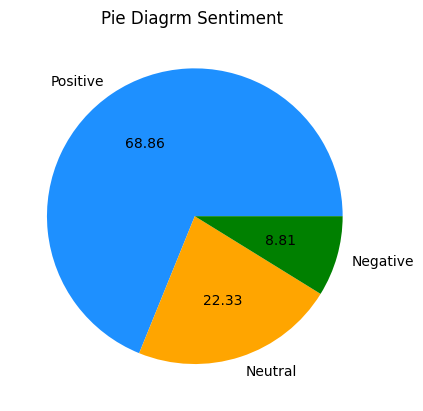

In [ ]:
# Import Library
import matplotlib.pyplot as plt

# Menghitung Jumlah Label Sentimen
sentiment_counts = df_dt['sentiment'].value_counts()

# Mengambil Jumlah Label Positif, Negatif, dan Netral
total_positive = sentiment_counts.get('positive', 0)
total_negative = sentiment_counts.get('negative', 0)
total_neutral = sentiment_counts.get('neutral', 0)

#Mencetak Jumlah Label Sentimen
print(f"Total Positive: {total_positive}")
print(f"Total Negative: {total_negative}")
print(f"Total Neutral: {total_neutral}")

# Menampilkan Pie Chart
sentiment_counts.plot.pie(autopct='%.2f', labels=['Positive', 'Neutral', 'Negative'], colors=['#1E90FF', '#FFA500', '#008000'])
plt.title('Pie Diagrm Sentiment ')
plt.ylabel('')  # Remove the y-label for better presentation
plt.show()

In [ ]:
data_df = pd.read_csv('/content/processed_data_with_scores.csv')

In [ ]:
data_df[['ulasan_text', 'max_positive', 'max_negative','sentiment']]

,ulasan_text,max_positive,max_negative,sentiment
0,pelayanan cepat ramah terima kasih pln mobile,5,-1,positive
1,aplikasinya membantu mudah tampilan menu fitu...,4,-1,positive
2,pelayanan bagus cepat terimakasih pelayanan,5,-1,positive
3,aplikasi baik cepat mempermudah pembayaran ap...,5,-1,positive
4,aplikasi pln mobile bermanfaat transaksi keli...,4,-1,positive
...,...,...,...,...
12349,terima kasih pln mobile mudah fitur terbaru m...,5,-4,positive
12350,manfaatnya membantu percepatan laporan ganggu...,4,-4,neutral
12351,bayar listrik bikin mudah cepat aplikasinya m...,5,-1,positive
12352,mengecek padam lampu tidak mengerti tidak ala...,2,-1,positive


# TF-IDF

In [ ]:
# Function to convert space-separated text into list of words
def convert_text_list(texts):
    if isinstance(texts, str):
        return texts.split()
    return []  # Return an empty list if the input is not a string

# Applying the function to the 'result_sentiment' column
data_df["prepos_list"] = data_df["ulasan_text"].apply(convert_text_list)

# Displaying an example of the converted list and its type
print(data_df["prepos_list"][90])
print("\ntype : ", type(data_df["prepos_list"][90]))

['eror', 'id', 'meter', 'tidak', 'temukan', 'membaik', 'sayang', 'transaksi', 'pembelian', 'pulsa']

type :  <class 'list'>


#### Hitung TF

In [ ]:
def calc_TF(document):
    # Counts the number of times the word appears in review
    TF_dict = {}
    for term in document:
        if term in TF_dict:
            TF_dict[term] += 1
        else:
            TF_dict[term] = 1
    # Computes tf for each word
    for term in TF_dict:
        TF_dict[term] = TF_dict[term] / len(document)
    return TF_dict

data_df["TF_dict"] = data_df['prepos_list'].apply(calc_TF)

data_df[["TF_dict"]]

,TF_dict
0,"{'pelayanan': 0.14285714285714285, 'cepat': 0...."
1,"{'aplikasinya': 0.14285714285714285, 'membantu..."
2,"{'pelayanan': 0.4, 'bagus': 0.2, 'cepat': 0.2,..."
3,"{'aplikasi': 0.2857142857142857, 'baik': 0.142..."
4,"{'aplikasi': 0.041666666666666664, 'pln': 0.08..."
...,...
12349,"{'terima': 0.043478260869565216, 'kasih': 0.04..."
12350,"{'manfaatnya': 0.14285714285714285, 'membantu'..."
12351,"{'bayar': 0.1, 'listrik': 0.1, 'bikin': 0.1, '..."
12352,"{'mengecek': 0.058823529411764705, 'padam': 0...."


In [ ]:
data_df.to_csv('tf_result.csv')

In [ ]:
# Check TF result
index = 90

print('%20s' % "term", "\t", "TF\n")
for key in data_df["TF_dict"][index]:
    print('%20s' % key, "\t", data_df["TF_dict"][index][key])

                term 	 TF

                eror 	 0.1
                  id 	 0.1
               meter 	 0.1
               tidak 	 0.1
             temukan 	 0.1
             membaik 	 0.1
              sayang 	 0.1
           transaksi 	 0.1
           pembelian 	 0.1
               pulsa 	 0.1


#### Hitung DF

In [ ]:
def calc_DF(tfDict):
    count_DF = {}
    # Run through each document's tf dictionary and increment countDict's (term, doc) pair
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(data_df["TF_dict"])

#### Hitung IDF

In [ ]:
n_document = len(data_df)

def calc_IDF(__n_document, __DF):
    IDF_Dict = {}
    for term in __DF:
        IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
    return IDF_Dict

#Stores the idf dictionary
IDF = calc_IDF(n_document, DF)

# Check IDF result for a sample term
print('%20s' % "term", "\t", "IDF\n")
for key in IDF:
    print('%20s' % key, "\t", IDF[key])

Streaming output truncated to the last 5000 lines.
           pekerjaan 	 5.509712170827698
        terbengkalai 	 8.323122887587735
            deadline 	 8.323122887587735
              mundur 	 8.035440815135955
             ekonomi 	 8.323122887587735
          berantakan 	 7.812297263821744
                  ku 	 5.758173530126198
                 tks 	 5.187628671658585
                  pb 	 7.023839903457474
         pendaftaran 	 6.243681345907899
         mempercepat 	 5.81081726361162
           amplikasi 	 7.224510598919625
           memberkan 	 8.323122887587735
        administrasi 	 7.342293634576008
             ngerang 	 8.728587995695898
            berulang 	 6.286240960326695
             buatkan 	 7.812297263821744
             harinya 	 7.812297263821744
               terim 	 8.323122887587735
              thanks 	 5.615072686485525
          hermansyah 	 8.728587995695898
             wahyudi 	 8.728587995695898
         penyampaian 	 7.629975707027789
       

In [ ]:
data_df.to_csv('IDF_result.csv')

#### Hitung TF-IDF

In [ ]:
#calc TF-IDF
def calc_TF_IDF(TF):
    TF_IDF_Dict = {}
    #For each word in the review, we multiply its tf and its idf.
    for key in TF:
        TF_IDF_Dict[key] = TF[key] * IDF[key]
    return TF_IDF_Dict

#Stores the TF-IDF Series
data_df["TF-IDF_dict"] = data_df["TF_dict"].apply(calc_TF_IDF)

In [ ]:
# Check TF-IDF result
index = 90

print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
for key in data_df["TF-IDF_dict"][index]:
    print('%20s' % key, "\t", data_df["TF_dict"][index][key] ,"\t" , data_df["TF-IDF_dict"][index][key])

                term 	         TF 	              TF-IDF

                eror 	 0.1 	 0.578414901652946
                  id 	 0.1 	 0.5327390614033745
               meter 	 0.1 	 0.3604624016292641
               tidak 	 0.1 	 0.22431896924921446
             temukan 	 0.1 	 0.7812297263821745
             membaik 	 0.1 	 0.6936828526467844
              sayang 	 0.1 	 0.5708163109551537
           transaksi 	 0.1 	 0.3164067588373206
           pembelian 	 0.1 	 0.3084909445109404
               pulsa 	 0.1 	 0.34555884371321527


In [ ]:
index = 90
data_to_save = {
    "term": list(data_df["TF-IDF_dict"][index].keys()),
    "TF": list(data_df["TF_dict"][index].values()),
    "TF-IDF": list(data_df["TF-IDF_dict"][index].values())
}
df = pd.DataFrame(data_to_save)

# Menyimpan DataFrame ke dalam file CSV
df.to_csv("Result.csv", index=False)

In [ ]:
# Fill NaN values in the result_sentiment column
data_df['ulasan_text'] = data_df['ulasan_text'].fillna('')
data_df['ulasan_text']

,ulasan_text
0,pelayanan cepat ramah terima kasih pln mobile
1,aplikasinya membantu mudah tampilan menu fitu...
2,pelayanan bagus cepat terimakasih pelayanan
3,aplikasi baik cepat mempermudah pembayaran ap...
4,aplikasi pln mobile bermanfaat transaksi keli...
...,...
12349,terima kasih pln mobile mudah fitur terbaru m...
12350,manfaatnya membantu percepatan laporan ganggu...
12351,bayar listrik bikin mudah cepat aplikasinya m...
12352,mengecek padam lampu tidak mengerti tidak ala...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Apply CountVectorizer to the result_sentiment column
bow_transformer = CountVectorizer().fit(data_df['ulasan_text'])

# Print the vocabulary
print(bow_transformer.vocabulary_)

{'pelayanan': 3737, 'cepat': 778, 'ramah': 4298, 'terima': 5221, 'kasih': 2074, 'pln': 4137, 'mobile': 3307, 'aplikasinya': 199, 'membantu': 2906, 'mudah': 3357, 'tampilan': 5041, 'menu': 3183, 'fiturnya': 1523, 'bagus': 279, 'terimakasih': 5224, 'aplikasi': 197, 'baik': 288, 'mempermudah': 2968, 'pembayaran': 3783, 'ribet': 4417, 'bermanfaat': 519, 'transaksi': 5423, 'kelistrikan': 2179, 'ditampilkan': 1293, 'dipahami': 1201, 'dbn': 922, 'fitur': 1521, 'swayam': 4985, 'pembelian': 3787, 'token': 5394, 'listrik': 2614, 'serba': 4733, 'tampan': 5037, 'the': 5333, 'best': 583, 'pasang': 3664, 'baru': 347, 'perubahan': 4065, 'daya': 920, 'lapor': 2535, 'ganggu': 1575, 'cukup': 861, 'mobil': 3306, 'update': 5541, 'data': 910, 'tidak': 5344, 'sesuai': 4755, 'berbeda': 446, 'real': 4325, 'time': 5353, 'menyediakan': 3209, 'pengaduan': 3856, 'semoga': 4688, 'manfa': 2746, 'at': 241, 'canggih': 746, 'teruslah': 5318, 'berjuang': 486, 'negerimu': 3417, 'lengkap': 2583, 'top': 5406, 'mantap': 27

In [ ]:
# Get the feature names (words) from the vectorizer
feature_names = bow_transformer.vocabulary_

# Print the feature names
print("Feature names (words):")
print(list(feature_names.keys()))

Feature names (words):
['pelayanan', 'cepat', 'ramah', 'terima', 'kasih', 'pln', 'mobile', 'aplikasinya', 'membantu', 'mudah', 'tampilan', 'menu', 'fiturnya', 'bagus', 'terimakasih', 'aplikasi', 'baik', 'mempermudah', 'pembayaran', 'ribet', 'bermanfaat', 'transaksi', 'kelistrikan', 'ditampilkan', 'dipahami', 'dbn', 'fitur', 'swayam', 'pembelian', 'token', 'listrik', 'serba', 'tampan', 'the', 'best', 'pasang', 'baru', 'perubahan', 'daya', 'lapor', 'ganggu', 'cukup', 'mobil', 'update', 'data', 'tidak', 'sesuai', 'berbeda', 'real', 'time', 'menyediakan', 'pengaduan', 'semoga', 'manfa', 'at', 'canggih', 'teruslah', 'berjuang', 'negerimu', 'lengkap', 'top', 'mantap', 'sistem', 'diperbaiki', 'masak', 'mengecek', 'langsung', 'nyala', 'pakai', 'nomor', 'dianggap', 'laporan', 'ulang', 'cek', 'lokasi', 'petugas', 'banget', 'mohon', 'ui', 'mati', 'detail', 'penanganannya', 'berbelit', 'pemadaman', 'berapa', 'biaya', 'tambahan', 'melaporkan', 'kantor', 'termudahkan', 'gangguan', 'isi', 'pulsa', 'p

In [ ]:
text_bow = bow_transformer.transform(data_df['ulasan_text'])
print(text_bow)
text_bow

  (0, 778)	1
  (0, 2074)	1
  (0, 3307)	1
  (0, 3737)	1
  (0, 4137)	1
  (0, 4298)	1
  (0, 5221)	1
  (1, 199)	1
  (1, 279)	1
  (1, 1523)	1
  (1, 2906)	1
  (1, 3183)	1
  (1, 3357)	1
  (1, 5041)	1
  (2, 279)	1
  (2, 778)	1
  (2, 3737)	2
  (2, 5224)	1
  (3, 197)	2
  (3, 288)	1
  (3, 778)	1
  (3, 2968)	1
  (3, 3783)	1
  (3, 4417)	1
  (4, 197)	1
  :	:
  (12353, 2074)	1
  (12353, 2255)	1
  (12353, 2481)	1
  (12353, 2729)	1
  (12353, 2797)	1
  (12353, 2906)	1
  (12353, 3266)	1
  (12353, 3307)	1
  (12353, 3357)	2
  (12353, 3527)	1
  (12353, 3664)	1
  (12353, 3733)	1
  (12353, 3756)	1
  (12353, 3794)	1
  (12353, 3857)	1
  (12353, 3859)	1
  (12353, 4135)	1
  (12353, 4137)	1
  (12353, 4189)	1
  (12353, 4393)	1
  (12353, 4454)	1
  (12353, 5007)	1
  (12353, 5021)	1
  (12353, 5174)	1
  (12353, 5221)	1


<12354x5694 sparse matrix of type '<class 'numpy.int64'>'
	with 119695 stored elements in Compressed Sparse Row format>

In [ ]:
X = text_bow.toarray()
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(12354, 5694)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

ulasan_tfidf=tfidf_transformer.transform(text_bow)
print(ulasan_tfidf)
print(ulasan_tfidf.shape)

TfidfTransformer()
  (0, 5221)	0.43273773121323467
  (0, 4298)	0.5391348397113879
  (0, 4137)	0.2145805000371352
  (0, 3737)	0.3847288812900061
  (0, 3307)	0.26692949750947575
  (0, 2074)	0.41606435174313666
  (0, 778)	0.2892225372733844
  (1, 5041)	0.5866546037441055
  (1, 3357)	0.21191822061611523
  (1, 3183)	0.466807549693212
  (1, 2906)	0.19877212798484656
  (1, 1523)	0.415006263128166
  (1, 279)	0.2926588095635883
  (1, 199)	0.3092378034971795
  (2, 5224)	0.42441779881854097
  (2, 3737)	0.7626473108357139
  (2, 778)	0.28666263570470135
  (2, 279)	0.39504828136812853
  (3, 4417)	0.5137241431166867
  (3, 3783)	0.4181411843333182
  (3, 2968)	0.41581722736166105
  (3, 778)	0.2567734838111834
  (3, 288)	0.39758269219779047
  (3, 197)	0.40538484067468744
  (4, 5423)	0.164631417829569
  :	:
  (12353, 3857)	0.20043879674379617
  (12353, 3794)	0.16777901556351116
  (12353, 3756)	0.13756448381178982
  (12353, 3733)	0.25245456162111196
  (12353, 3664)	0.12165930117636073
  (12353, 3527)	0.18

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

data_n=pd.DataFrame(data=ulasan_tfidf.toarray(),columns=list(feature_names.keys()))
data_n

,pelayanan,cepat,ramah,terima,kasih,pln,mobile,aplikasinya,membantu,mudah,...,menentu,ketentuannya,etis,tersimpan,blitar,bng,konoha,biman,gc,kenak
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Convert the BOW representation to a DataFrame
bow_table = pd.DataFrame(data=text_bow.toarray(), columns=list(feature_names.keys()))

# Concatenate the BOW and TF-IDF tables
combined_table = pd.concat([bow_table, data_n], axis=1)

# Print the combined table
print("Kata-kata (Fitur), Bobot TF-IDF, dan BOW:")
print(combined_table)

Kata-kata (Fitur), Bobot TF-IDF, dan BOW:
       pelayanan  cepat  ramah  terima  kasih  pln  mobile  aplikasinya  \
0              0      0      0       0      0    0       0            0   
1              0      0      0       0      0    0       0            0   
2              0      0      0       0      0    0       0            0   
3              0      0      0       0      0    0       0            0   
4              0      0      0       0      0    0       0            0   
...          ...    ...    ...     ...    ...  ...     ...          ...   
12349          0      0      0       0      0    0       0            0   
12350          0      0      0       0      0    0       0            0   
12351          0      0      0       0      0    0       0            0   
12352          0      0      0       0      0    0       0            0   
12353          0      0      0       0      0    0       0            0   

       membantu  mudah  ...  menentu  ketentuannya  etis 

# Split Data

In [ ]:
# Import Library
from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, data_df.sentiment, test_size=0.1, random_state=42)

# Print shapes dengan judul
print("Shape of x_train (Training Data Features):", x_train.shape)
print("Shape of x_test (Testing Data Features):", x_test.shape)
print("Shape of y_train (Training Data Labels):", y_train.shape)
print("Shape of y_test (Testing Data Labels):", y_test.shape)

Shape of x_train (Training Data Features): (11118, 5694)
Shape of x_test (Testing Data Features): (1236, 5694)
Shape of y_train (Training Data Labels): (11118,)
Shape of y_test (Testing Data Labels): (1236,)


# Modelling Naive Bayes

In [ ]:
# Import Library
from sklearn.naive_bayes import MultinomialNB

# Model training
model = MultinomialNB().fit(x_train, y_train)

# Prediction
y_pred = model.predict(x_test)

# Evaluasi

Test time:  0.000s
Accuracy:   0.810
              precision    recall  f1-score   support

    negative       0.55      0.61      0.58        95
     neutral       0.65      0.43      0.52       252
    positive       0.87      0.94      0.90       889

    accuracy                           0.81      1236
   macro avg       0.69      0.66      0.66      1236
weighted avg       0.80      0.81      0.80      1236



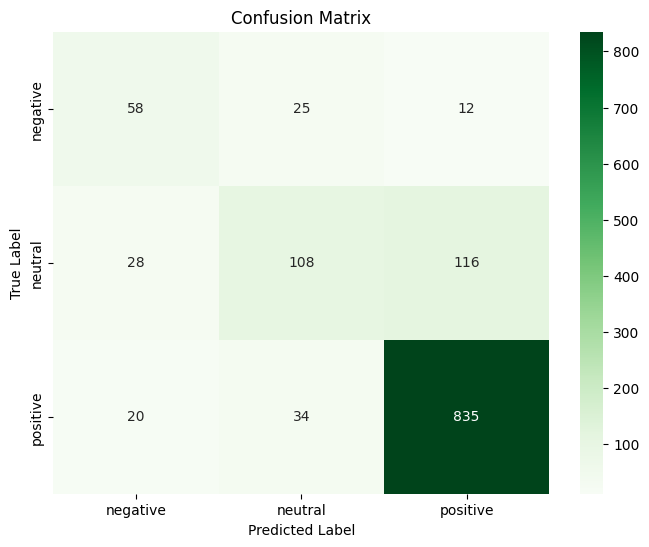

In [ ]:
# Import Library
from time import time
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from pandas import DataFrame
from time import time

# Evaluasi model
t = time()
test_time = time() - t
print("Test time:  %0.3fs" % test_time)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:   %0.3f" % accuracy)

# Classification report
print(metrics.classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
df_cm = DataFrame(conf_matrix, index=['negative', 'neutral', 'positive'], columns=['negative', 'neutral', 'positive'])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, cmap='Greens', annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# WordCloud

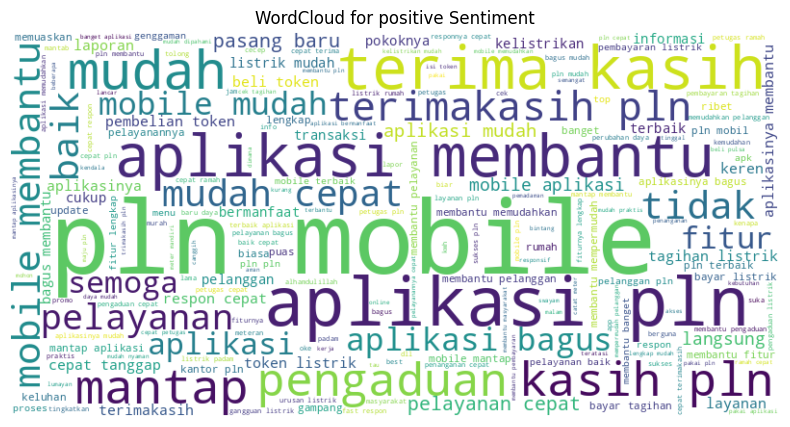

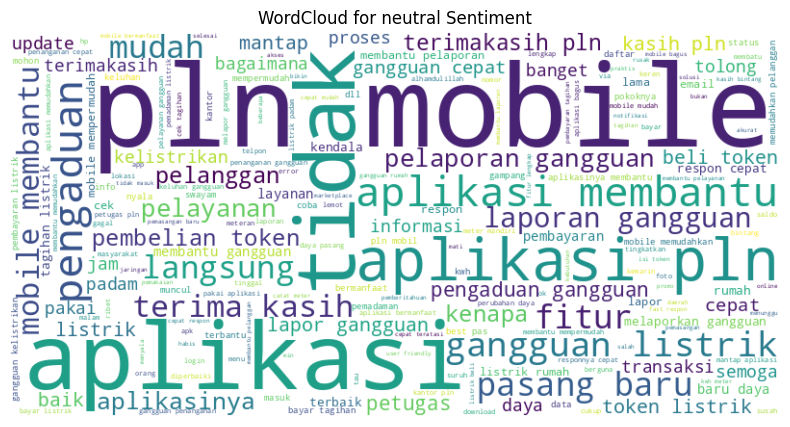

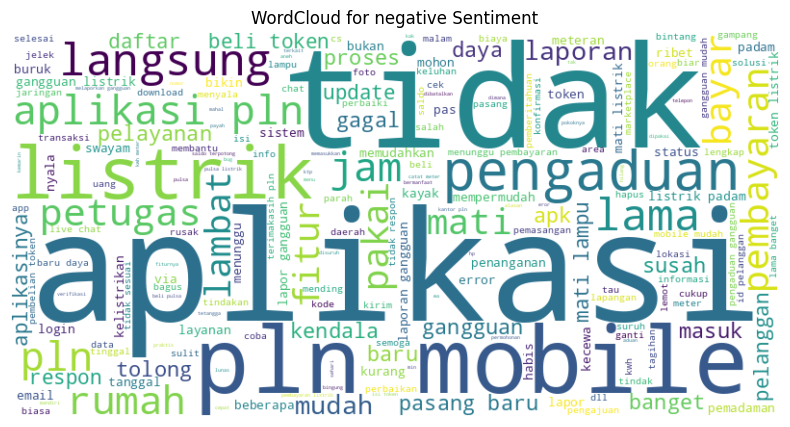

In [ ]:
from wordcloud import WordCloud

# Menghasilkan WordCloud untuk sentimen positif, netral, dan negatif# Berdasarkan Rating
sentiments = ['positive', 'neutral', 'negative']
for sentiment in sentiments:
    text = ' '.join(df_dt[df_dt['sentiment'] == sentiment]['detokenized'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Sentimen berdasarkan rating

In [ ]:
# Tampilkan berdasarkan rating 1,2,3,4,5
df_dt['rating'].value_counts()

,count
rating,
5,10223
1,1001
4,445
3,374
2,311


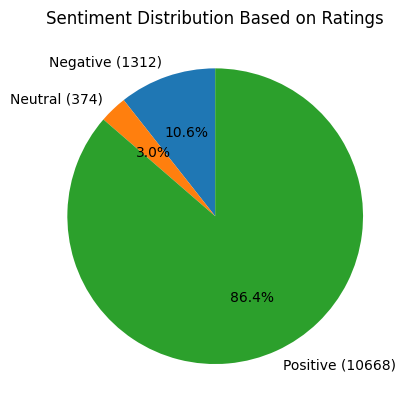

In [ ]:
import matplotlib.pyplot as plt

# Asumsikan 'df_dt' adalah DataFrame Anda dan 'rating' adalah kolom dengan peringkat
rating_counts = df_dt['rating'].value_counts()

# Tentukan kategori sentimen berdasarkan peringkat
negative_ratings = rating_counts.get(1, 0) + rating_counts.get(2, 0)
neutral_ratings = rating_counts.get(3, 0)
positive_ratings = rating_counts.get(4, 0) + rating_counts.get(5, 0)

# Membuat kamus untuk diagram lingkaran
sentiment_distribution = {
    'Negative': negative_ratings,
    'Neutral': neutral_ratings,
    'Positive': positive_ratings
}

# Menyiapkan label dengan hitungan
labels = [f'{key} ({value})' for key, value in sentiment_distribution.items()]

# Plot diagram lingkaran
plt.pie(sentiment_distribution.values(), labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution Based on Ratings')
plt.show()